(12,)
17
51 13.0
35 9.0


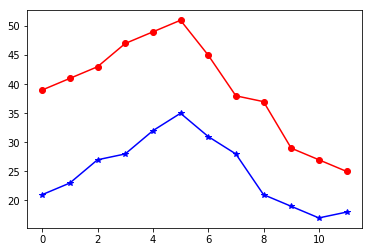

In [67]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt
%matplotlib inline


months = np.arange(1,13)
max_v = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_v = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
sigma = np.array([0,0,0,0,0,0,0,0,0,0,0,0])

print(sigma.shape)

#print(Max.mean())
print(min_v.min())

plt.plot(max_v, 'ro-')
plt.plot(min_v, 'b*-')

def my_func(times, ampl, range_v):
    #print("times: {}, ampl: {}, range: {}".format(times, ampl, range_v))
    #return (ampl + np.cos(times + np.pi / 2))
    #return (ampl  + range * np.cos((times ) * 2 * np.pi / times.max()))
    return (ampl  + range_v * np.sin(np.pi * (times) / times.max()))

h_range1 = (max_v.max() - max_v.min())/2
h_range2 = (min_v.max() - min_v.min())/2
max1, max2 = max_v.max(), min_v.max()

params_max, cov_params_max = optimize.curve_fit(my_func, months, max_v, [0, h_range1 ], method = 'lm')
print(max1, h_range1)
params_min, cov_params_min = optimize.curve_fit(my_func, months, min_v, [0, h_range2 ], method = 'dogbox')
print(max2, h_range2)

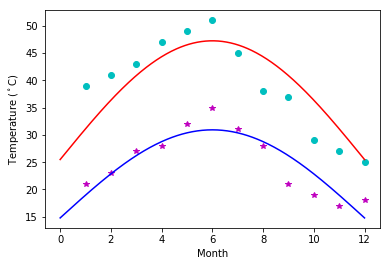

In [68]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, max_v, 'co')
plt.plot(days, my_func(days, *params_max), 'r-')
plt.plot(months, min_v, 'm*')
plt.plot(days, my_func(days, *params_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()